# PyTorch DataLoaders and Datasets Tutorial

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/maheshghanta/Codes/blob/master/PyTorch_Tutorials/2.DataLoaders_and_Datasets.ipynb)

Learn how to efficiently load and process data for training neural networks!

## Overview

### **Dataset**
- Stores samples and their corresponding labels
- Implements `__len__()` and `__getitem__()`
- Can be built-in (CIFAR10, MNIST) or custom

### **DataLoader**
- Wraps a Dataset
- Provides batching, shuffling, parallel loading
- Returns an iterator over the dataset

### **Why Use Them?**
- **Efficient**: Parallel data loading with multiple workers
- **Flexible**: Custom datasets for any data format
- **Convenient**: Automatic batching and shuffling
- **Memory-friendly**: Load data on-the-fly, not all at once

## Setup and Imports

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
from torch.utils.data.sampler import SubsetRandomSampler, WeightedRandomSampler
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

PyTorch version: 2.9.0
Torchvision version: 0.24.0


## 1. Built-in Datasets

In [4]:
# Download CIFAR10 dataset
cifar_train = datasets.CIFAR10(root='./data', train=True, download=True)
cifar_test = datasets.CIFAR10(root='./data', train=False, download=True)

print(f"Training samples: {len(cifar_train)}")
print(f"Test samples: {len(cifar_test)}")
print(f"Classes: {cifar_train.classes}")

Training samples: 50000
Test samples: 10000
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Image type: <class 'PIL.Image.Image'>
Image size: (32, 32)
Label: 4 (deer)


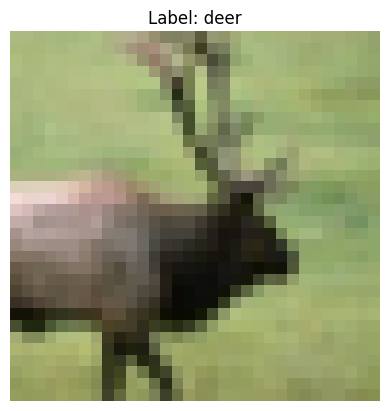

In [7]:
# Inspect a single sample
image, label = cifar_train[34]
print(f"Image type: {type(image)}")
print(f"Image size: {image.size}")
print(f"Label: {label} ({cifar_train.classes[label]})")

# Display the image
plt.imshow(image)
plt.title(f"Label: {cifar_train.classes[label]}")
plt.axis('off')
plt.show()


## 2. Transforms

Transforms preprocess data before feeding to the model


In [8]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to Tensor (C, H, W)
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet stats
        std=[0.229, 0.224, 0.225]
    )
])

# Apply transforms
cifar_train_transformed = datasets.CIFAR10(
    root='./data',
    train=True,
    transform=transform
)

# Check transformed sample
image_tensor, label = cifar_train_transformed[0]
print(f"Tensor shape: {image_tensor.shape}")  # (C, H, W)
print(f"Tensor dtype: {image_tensor.dtype}")
print(f"Value range: [{image_tensor.min():.2f}, {image_tensor.max():.2f}]")


Tensor shape: torch.Size([3, 32, 32])
Tensor dtype: torch.float32
Value range: [-2.12, 2.39]


## 3. DataLoader Basics

DataLoader wraps a Dataset and provides batching, shuffling, and parallel loading


In [9]:
# Create DataLoader
train_loader = DataLoader(
    cifar_train_transformed,
    batch_size=32,
    shuffle=True,
    num_workers=2,
    pin_memory=True  # Faster GPU transfer
)

print(f"Total batches: {len(train_loader)}")
print(f"Samples per batch: {train_loader.batch_size}")


Total batches: 1563
Samples per batch: 32


In [10]:
# Iterate through DataLoader
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx}:")
    print(f"  Images shape: {images.shape}")  # (batch_size, C, H, W)
    print(f"  Labels shape: {labels.shape}")  # (batch_size,)
    print(f"  Labels: {labels[:10].tolist()}")
    
    if batch_idx == 2:  # Show only first 3 batches
        break


/Users/mghanta/Documents/Codes/Non_Core/ML_Demos/ml-model-development/Pytorch_Tutorials/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Batch 0:
  Images shape: torch.Size([32, 3, 32, 32])
  Labels shape: torch.Size([32])
  Labels: [7, 4, 7, 5, 8, 6, 8, 6, 0, 3]
Batch 1:
  Images shape: torch.Size([32, 3, 32, 32])
  Labels shape: torch.Size([32])
  Labels: [1, 9, 4, 9, 6, 5, 1, 4, 4, 5]
Batch 2:
  Images shape: torch.Size([32, 3, 32, 32])
  Labels shape: torch.Size([32])
  Labels: [8, 0, 5, 8, 8, 9, 0, 5, 1, 4]


### Visualize a Batch


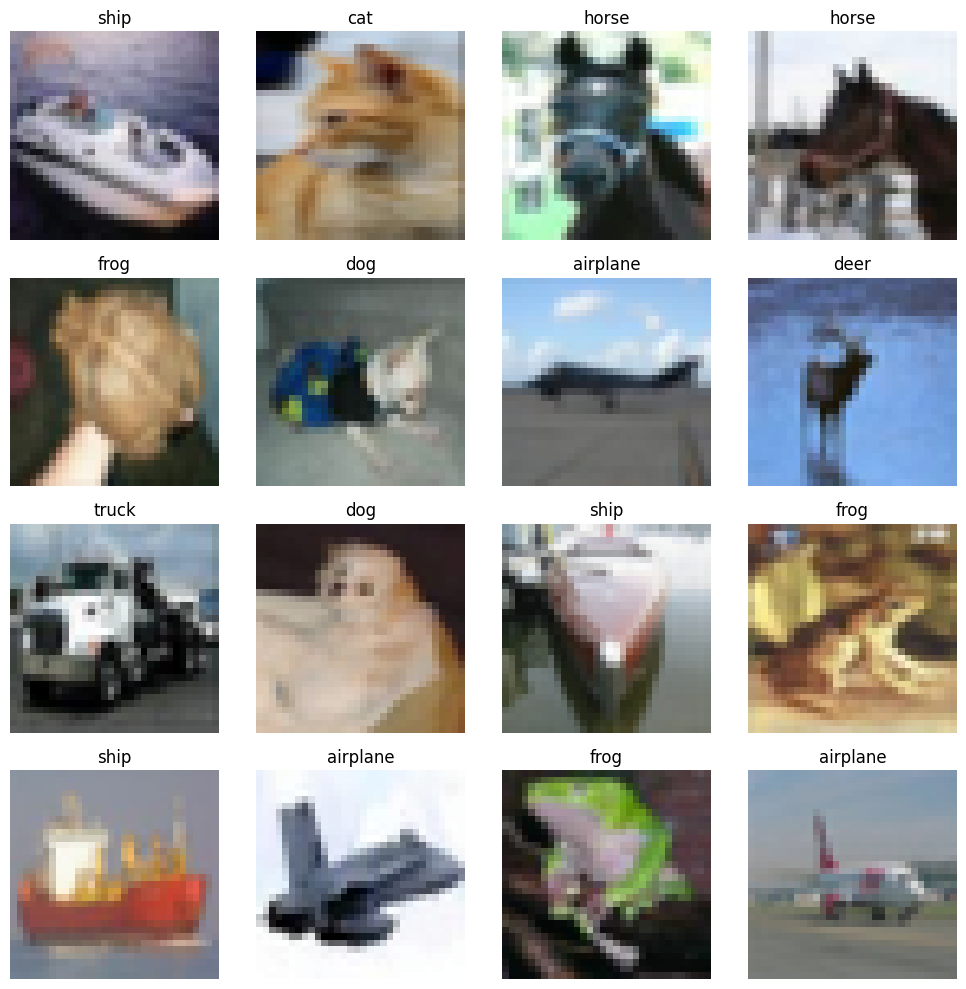

In [11]:
# Get one batch
images, labels = next(iter(train_loader))

# Display first 16 images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Denormalize
    img = images[i].permute(1, 2, 0).numpy()
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img = np.clip(img, 0, 1)
    
    ax.imshow(img)
    ax.set_title(cifar_train.classes[labels[i]])
    ax.axis('off')
    
plt.tight_layout()
plt.show()


## 4. DataLoader Parameters

Explore all important DataLoader parameters


In [12]:
# Comprehensive DataLoader configuration
loader_config = DataLoader(
    cifar_train_transformed,
    
    # Batch size: Number of samples per batch
    batch_size=64,
    
    # Shuffle: Randomize order every epoch (True for training, False for eval)
    shuffle=True,
    
    # num_workers: Parallel data loading (0=main process only)
    num_workers=4,
    
    # pin_memory: Pin memory for faster GPU transfer
    pin_memory=True,
    
    # drop_last: Drop last incomplete batch
    drop_last=False,
    
    # timeout: Timeout for collecting a batch from workers (seconds)
    timeout=0,
    
    # prefetch_factor: Number of batches loaded in advance per worker
    prefetch_factor=2,
    
    # persistent_workers: Keep worker processes alive between epochs
    persistent_workers=False
)

print("DataLoader Configuration:")
print(f"  Batch size: {loader_config.batch_size}")
print(f"  Num workers: {loader_config.num_workers}")
print(f"  Pin memory: {loader_config.pin_memory}")
print(f"  Drop last: {loader_config.drop_last}")


DataLoader Configuration:
  Batch size: 64
  Num workers: 4
  Pin memory: True
  Drop last: False


## 5. Custom Dataset

Create your own Dataset class for custom data


In [13]:
class CustomImageDataset(Dataset):
    """Custom Dataset for loading images"""
    
    def __init__(self, data, labels, transform=None):
        """
        Args:
            data: List of image data or paths
            labels: List of labels
            transform: Optional transform to apply
        """
        self.data = data
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        """Return the total number of samples"""
        return len(self.data)
    
    def __getitem__(self, idx):
        """Get a sample by index"""
        image = self.data[idx]
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Create dummy data
dummy_data = [torch.randn(3, 32, 32) for _ in range(1000)]
dummy_labels = torch.randint(0, 10, (1000,))

# Create custom dataset
custom_dataset = CustomImageDataset(dummy_data, dummy_labels)

print(f"Custom dataset size: {len(custom_dataset)}")
sample, label = custom_dataset[0]
print(f"Sample shape: {sample.shape}")
print(f"Label: {label}")


Custom dataset size: 1000
Sample shape: torch.Size([3, 32, 32])
Label: 5


### TensorDataset - Quick Custom Dataset


In [14]:
# Create from tensors directly
X = torch.randn(500, 3, 32, 32)
y = torch.randint(0, 10, (500,))

tensor_dataset = TensorDataset(X, y)
tensor_loader = DataLoader(tensor_dataset, batch_size=32, shuffle=True)

print(f"TensorDataset size: {len(tensor_dataset)}")
batch_x, batch_y = next(iter(tensor_loader))
print(f"Batch X shape: {batch_x.shape}")
print(f"Batch y shape: {batch_y.shape}")


TensorDataset size: 500
Batch X shape: torch.Size([32, 3, 32, 32])
Batch y shape: torch.Size([32])


## 6. Train/Val/Test Split


In [15]:
# Method 1: Using random_split
full_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform)

# Split: 80% train, 20% validation
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = random_split(
    full_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)  # For reproducibility
)

print(f"Train size: {len(train_dataset)}")
print(f"Val size: {len(val_dataset)}")

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


Train size: 40000
Val size: 10000


In [16]:
# Method 2: Using SubsetRandomSampler
dataset_size = len(full_dataset)
indices = list(range(dataset_size))
split = int(0.2 * dataset_size)

# Shuffle indices
np.random.seed(42)
np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader_sampler = DataLoader(full_dataset, batch_size=64, sampler=train_sampler)
val_loader_sampler = DataLoader(full_dataset, batch_size=64, sampler=val_sampler)

print(f"Train batches: {len(train_loader_sampler)}")
print(f"Val batches: {len(val_loader_sampler)}")


Train batches: 625
Val batches: 157


## 7. Advanced Features

### Collate Function - Customize Batching


In [17]:
def custom_collate_fn(batch):
    """
    Custom collate function to handle batching
    
    Args:
        batch: List of (image, label) tuples
    
    Returns:
        Dictionary with images and labels
    """
    images = torch.stack([item[0] for item in batch])
    labels = torch.tensor([item[1] for item in batch])
    
    # Return as dictionary instead of tuple
    return {
        'images': images,
        'labels': labels,
        'batch_size': len(batch)
    }

# Create DataLoader with custom collate
custom_loader = DataLoader(
    cifar_train_transformed,
    batch_size=32,
    shuffle=True,
    collate_fn=custom_collate_fn
)

# Test custom collate
batch = next(iter(custom_loader))
print(f"Batch type: {type(batch)}")
print(f"Keys: {batch.keys()}")
print(f"Images shape: {batch['images'].shape}")
print(f"Labels shape: {batch['labels'].shape}")

Batch type: <class 'dict'>
Keys: dict_keys(['images', 'labels', 'batch_size'])
Images shape: torch.Size([32, 3, 32, 32])
Labels shape: torch.Size([32])
